In [27]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")


In [28]:

# Load the dataset
df = pd.read_csv('Sleep_Health_Lifestyle_Analysis.csv')


In [29]:

# Display first few rows of the dataset
print("Dataset Preview:")
display(df.head())


Dataset Preview:


,participant_id,gender,age,sleep_hours,stress_level,physical_activity,heart_rate,bmi,sleep_quality
0,1,M,25,7,Low,5000,60,22,4
1,2,F,26,6,High,7000,75,28,2
2,3,M,27,8,Medium,3000,70,24,5
3,4,F,28,5,Low,8000,65,30,3
4,5,M,29,7,High,4000,80,26,4


In [30]:

# Display basic info about the dataset
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   participant_id     100 non-null    int64 
 1   gender             100 non-null    object
 2   age                100 non-null    int64 
 3   sleep_hours        100 non-null    int64 
 4   stress_level       100 non-null    object
 5   physical_activity  100 non-null    int64 
 6   heart_rate         100 non-null    int64 
 7   bmi                100 non-null    int64 
 8   sleep_quality      100 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.2+ KB
None


In [31]:

# Display basic statistics of numerical columns
print("\nDescriptive Statistics:")
display(df.describe())



Descriptive Statistics:


,participant_id,age,sleep_hours,physical_activity,heart_rate,bmi,sleep_quality
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,38.500000,6.500000,5400.000000,70.000000,26.000000,3.600000
std,29.011492,8.833476,1.029857,1864.067454,7.106691,2.842676,1.024941
min,1.000000,25.000000,5.000000,3000.000000,60.000000,22.000000,2.000000
25%,25.750000,31.000000,6.000000,4000.000000,65.000000,24.000000,3.000000
50%,50.500000,38.000000,6.500000,5000.000000,70.000000,26.000000,4.000000
75%,75.250000,46.000000,7.000000,7000.000000,75.000000,28.000000,4.000000
max,100.000000,54.000000,8.000000,8000.000000,80.000000,30.000000,5.000000


In [32]:

# 1. Scatter plot: BMI vs Sleep Hours colored by Sleep Quality
print("Plot 1: BMI vs Sleep Hours colored by Sleep Quality")
fig1 = px.scatter(df, 
                  x='bmi', 
                  y='sleep_hours', 
                  color='sleep_quality', 
                  title='BMI vs Sleep Hours Colored by Sleep Quality',
                  labels={'bmi': 'BMI', 'sleep_hours': 'Sleep Hours', 'sleep_quality': 'Sleep Quality'})
fig1.show()


Plot 1: BMI vs Sleep Hours colored by Sleep Quality


In [33]:

# 2. Histogram: Distribution of Sleep Quality
print("Plot 2: Distribution of Sleep Quality")
fig2 = px.histogram(df, x='sleep_quality', title='Sleep Quality Count')
fig2.show()


Plot 2: Distribution of Sleep Quality


In [34]:

# 3. Scatter plot: Age vs Sleep Hours colored by Sleep Quality
print("Plot 3: Age vs Sleep Hours Colored by Sleep Quality")
fig3 = px.scatter(df, x='age', y='sleep_hours', color='sleep_quality',
                  title='Age vs Sleep Hours Colored by Sleep Quality',
                  labels={'age': 'Age', 'sleep_hours': 'Sleep Hours'})
fig3.show()


Plot 3: Age vs Sleep Hours Colored by Sleep Quality


In [35]:

# 4. Box plot: Sleep Hours distribution by Gender
print("Plot 4: Sleep Hours Distribution by Gender")
fig4 = px.box(df, x='gender', y='sleep_hours',
              title='Sleep Hours Distribution by Gender',
              labels={'gender': 'Gender', 'sleep_hours': 'Sleep Hours'})
fig4.show()


Plot 4: Sleep Hours Distribution by Gender


In [36]:

# 5. Violin plot: BMI distribution by Sleep Quality
print("Plot 5: BMI Distribution by Sleep Quality")
fig5 = px.violin(df, x='sleep_quality', y='bmi', box=True, points='all',
                 title='BMI Distribution by Sleep Quality',
                 labels={'sleep_quality': 'Sleep Quality', 'bmi': 'BMI'})
fig5.show()


Plot 5: BMI Distribution by Sleep Quality


In [37]:

# 6. Histogram: Distribution of Stress Levels
print("Plot 6: Distribution of Stress Levels")
fig6 = px.histogram(df, x='stress_level', title='Stress Level Count')
fig6.show()


Plot 6: Distribution of Stress Levels


In [38]:

# 7. Scatter plot: Physical Activity vs Sleep Hours colored by Gender
print("Plot 7: Physical Activity vs Sleep Hours Colored by Gender")
fig7 = px.scatter(df, x='physical_activity', y='sleep_hours', color='gender',
                  title='Physical Activity vs Sleep Hours Colored by Gender',
                  labels={'physical_activity': 'Physical Activity', 'sleep_hours': 'Sleep Hours'})
fig7.show()


Plot 7: Physical Activity vs Sleep Hours Colored by Gender


In [39]:

# 8. Box plot: Heart Rate distribution by Sleep Quality
print("Plot 8: Heart Rate Distribution by Sleep Quality")
fig8 = px.box(df, x='sleep_quality', y='heart_rate',
              title='Heart Rate Distribution by Sleep Quality',
              labels={'sleep_quality': 'Sleep Quality', 'heart_rate': 'Heart Rate'})
fig8.show()


Plot 8: Heart Rate Distribution by Sleep Quality


In [40]:

# 9. Scatter plot: Age vs BMI colored by Sleep Quality
print("Plot 9: Age vs BMI Colored by Sleep Quality")
fig9 = px.scatter(df, x='age', y='bmi', color='sleep_quality',
                  title='Age vs BMI Colored by Sleep Quality',
                  labels={'age': 'Age', 'bmi': 'BMI'})
fig9.show()


Plot 9: Age vs BMI Colored by Sleep Quality


In [41]:

# 10. Histogram: Distribution of Gender
print("Plot 10: Distribution of Gender")
fig10 = px.histogram(df, x='gender', title='Gender Count')
fig10.show()


Plot 10: Distribution of Gender


Plot 11: Correlation Heatmap of Numerical Features


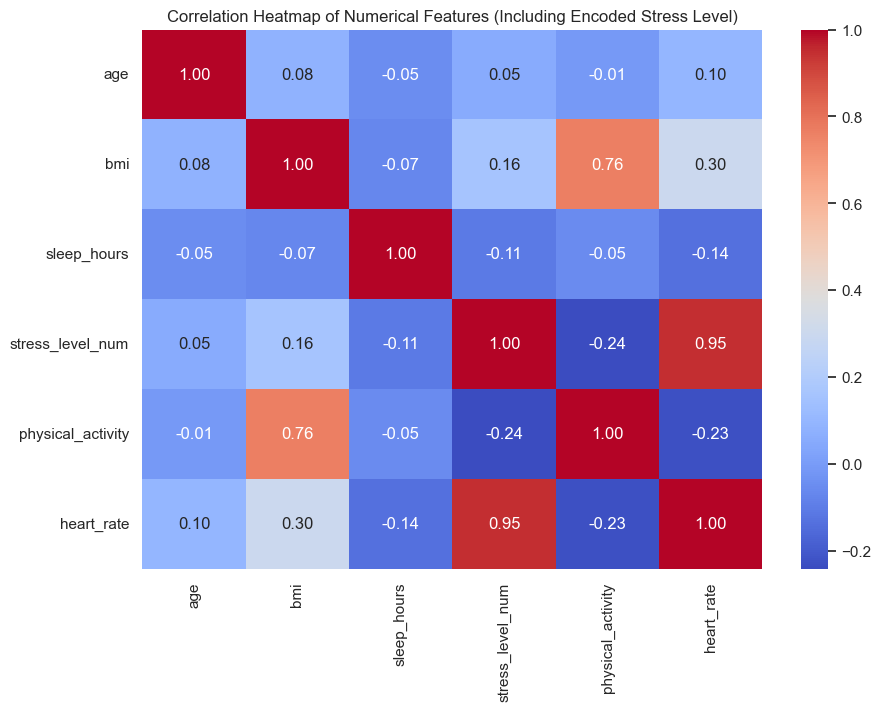

In [42]:

# 11. Correlation Heatmap of Numerical Features
print("Plot 11: Correlation Heatmap of Numerical Features")
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['stress_level_num'] = df['stress_level'].map(stress_map)
plt.figure(figsize=(10, 7))
corr = df[['age', 'bmi', 'sleep_hours', 'stress_level_num', 'physical_activity', 'heart_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features (Including Encoded Stress Level)')
plt.show()


In [43]:

# 12. Box Plot of Sleep Hours by Gender
fig12 = px.box(df, x='gender', y='sleep_hours', title='Sleep Hours Distribution by Gender',
               labels={'gender': 'Gender', 'sleep_hours': 'Sleep Hours'})
fig12.show()


In [44]:

# 13. Violin Plot of Stress Level by Sleep Quality
fig13 = px.violin(df, x='sleep_quality', y='stress_level', box=True, points='all',
                  title='Stress Level Distribution by Sleep Quality',
                  labels={'sleep_quality': 'Sleep Quality', 'stress_level': 'Stress Level'})
fig13.show()


Plot 14: Pair Plot of Key Health Variables


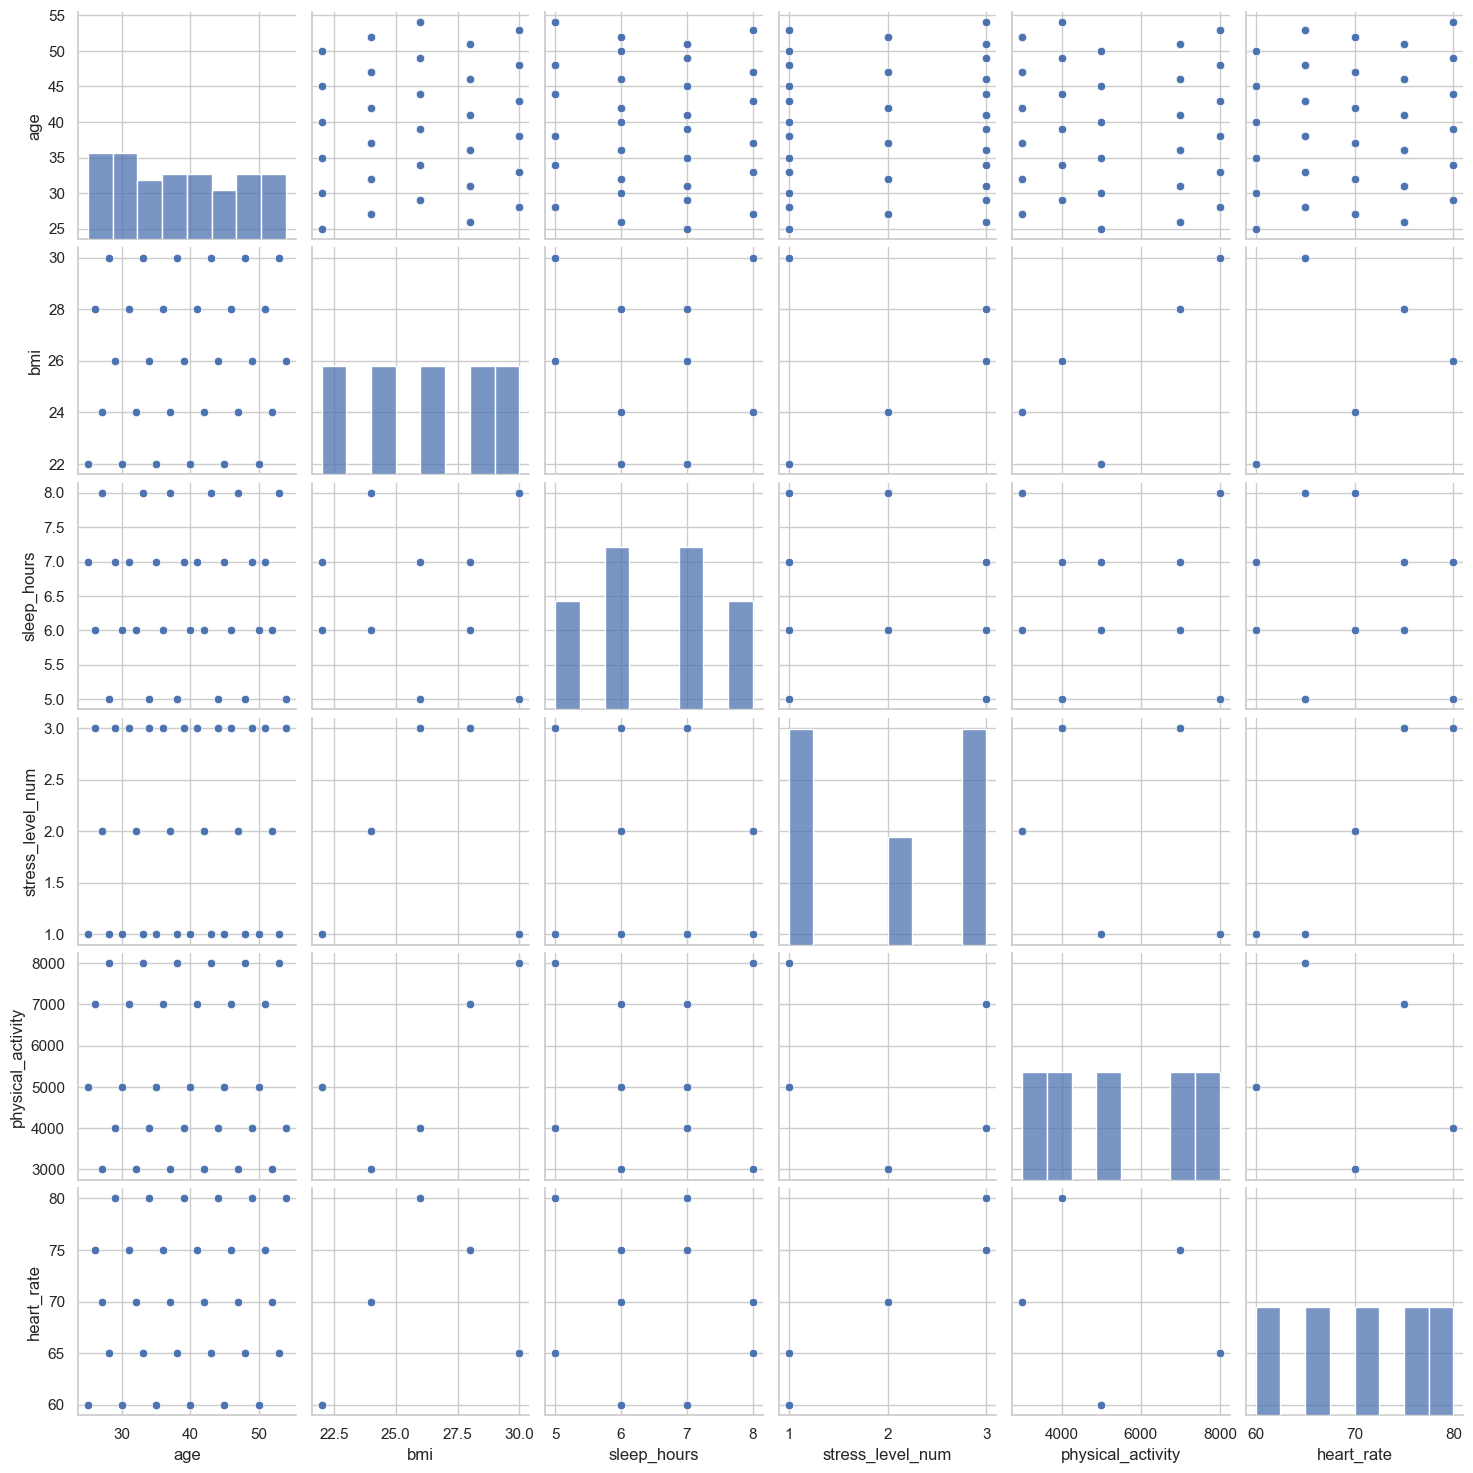

In [45]:

# 14. Pair Plot of Key Health Variables
print("Plot 14: Pair Plot of Key Health Variables")
sns.pairplot(df[['age', 'bmi', 'sleep_hours', 'stress_level_num', 'physical_activity', 'heart_rate']])
plt.show()


In [46]:

# 15. Histogram of Sleep Hours Distribution
fig15 = px.histogram(df, x='sleep_hours', nbins=20, title='Sleep Hours Distribution',
                     labels={'sleep_hours': 'Sleep Hours'})
fig15.show()


In [47]:

# 16. Scatter Plot of Physical Activity vs Sleep Hours
fig16 = px.scatter(df, x='physical_activity', y='sleep_hours',
                   title='Physical Activity vs Sleep Hours',
                   labels={'physical_activity': 'Physical Activity', 'sleep_hours': 'Sleep Hours'})
fig16.show()


In [48]:

# 17. Heart Rate Distribution by Gender
fig17 = px.histogram(df, x='heart_rate', color='gender', barmode='overlay',
                     title='Heart Rate Distribution by Gender',
                     labels={'heart_rate': 'Heart Rate'})
fig17.show()


In [49]:

# 18. Box Plot of Stress Level by Gender
fig18 = px.box(df, x='gender', y='stress_level', title='Stress Level Distribution by Gender',
               labels={'gender': 'Gender', 'stress_level': 'Stress Level'})
fig18.show()


In [50]:

# 19. Histogram of BMI Distribution
fig19 = px.histogram(df, x='bmi', nbins=20, title='BMI Distribution',
                     labels={'bmi': 'BMI'})
fig19.show()


In [51]:

# 20. Bar Chart of Sleep Quality Counts
sleep_quality_counts = df['sleep_quality'].value_counts().reset_index()
sleep_quality_counts.columns = ['sleep_quality', 'count']
fig20 = px.bar(sleep_quality_counts,
               x='sleep_quality',
               y='count',
               labels={'sleep_quality': 'Sleep Quality', 'count': 'Count'},
               title='Counts of Sleep Quality Categories')
fig20.show()


In [52]:
# Machine Learning Section

# Prepare data for ML models
features = ['age', 'bmi', 'stress_level_num', 'physical_activity', 'heart_rate']
X = df[features]
y = df['sleep_quality']



--- Linear Regression ---
Linear Regression MSE: 0.00
Linear Regression R2: 1.00


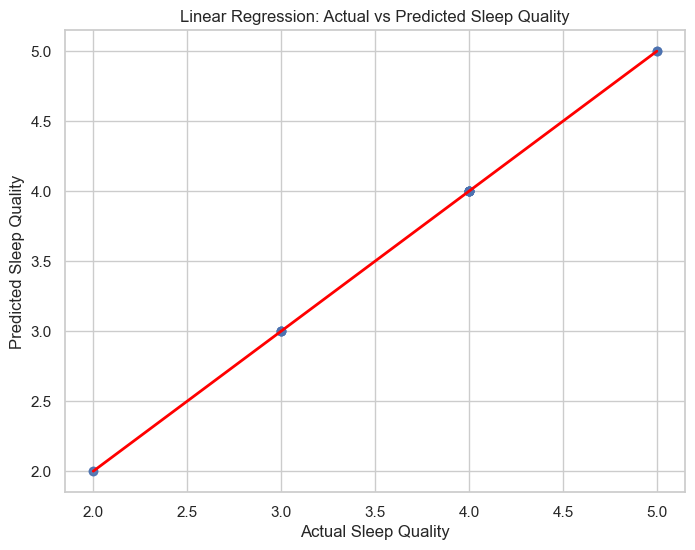

In [53]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')
plt.title('Linear Regression: Actual vs Predicted Sleep Quality')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()



--- Random Forest Regression ---
Random Forest MSE: 0.00
Random Forest R2: 1.00


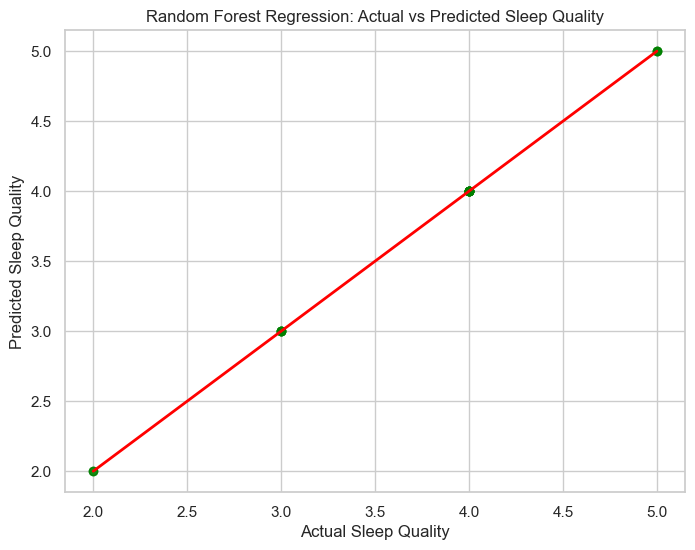

In [54]:

# 2. Random Forest Regression
print("\n--- Random Forest Regression ---")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')
plt.title('Random Forest Regression: Actual vs Predicted Sleep Quality')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()



--- Support Vector Regression (SVR) ---
SVR MSE: 0.20
SVR R2: 0.72


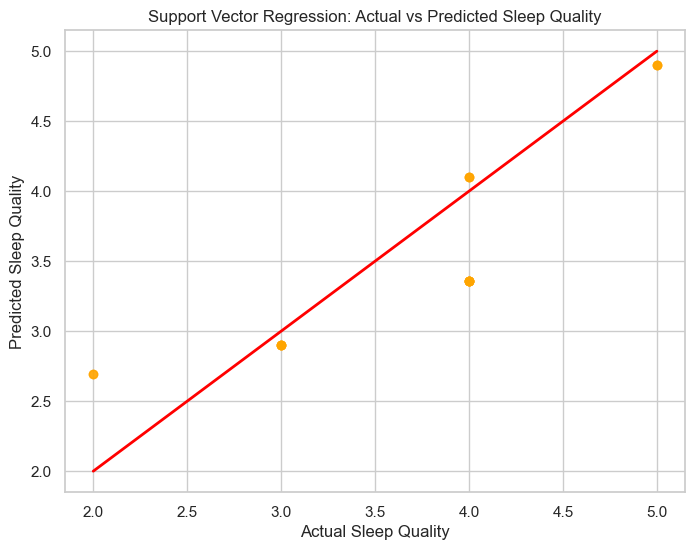

In [55]:

# 3. Support Vector Regression (SVR)
print("\n--- Support Vector Regression (SVR) ---")
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
print(f"SVR MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"SVR R2: {r2_score(y_test, y_pred_svr):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha=0.7, color='orange')
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')
plt.title('Support Vector Regression: Actual vs Predicted Sleep Quality')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()



--- Decision Tree Regression ---
Decision Tree MSE: 0.00
Decision Tree R2: 1.00


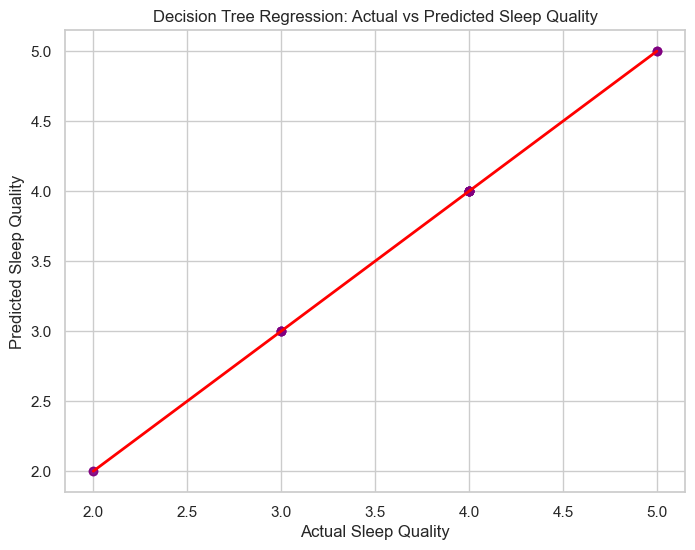

In [56]:

# 4. Decision Tree Regression
print("\n--- Decision Tree Regression ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"Decision Tree R2: {r2_score(y_test, y_pred_dt):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='purple')
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')
plt.title('Decision Tree Regression: Actual vs Predicted Sleep Quality')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()
